# Machine Learning Practical No.4

                                                                  
Clustering Analysis

  Implement K-Means clustering on Iris.csv dataset. Determine the number of clusters using the elbow method.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
df=pd.read_csv(r"Iris.csv")#Loading the dataset
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
num_df = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(num_df)

In [8]:
num_df.shape

(150, 4)

In [9]:
X.shape

(150, 4)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

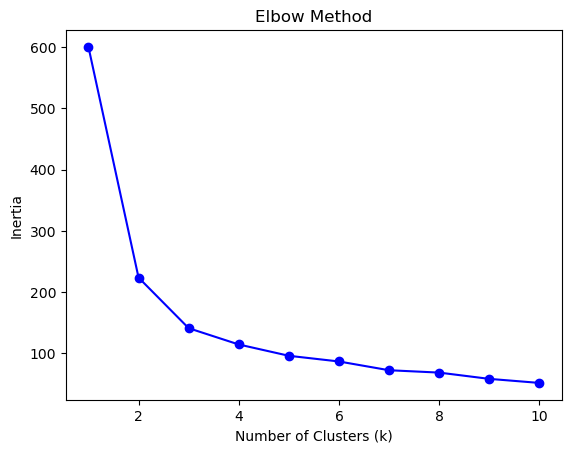

In [11]:
# Step 5: Elbow Method (Simplified)
inertia = []#Creates an empty list to store the inertia (error) value for each K (number of clusters)
K = range(1, 11)#Creates a range of cluster numbers from 1 to 10. 
#The algorithm will try clustering the data into 1, 2, 3, ..., 10 clusters.

for k in K:
    model = KMeans(n_clusters=k, random_state=0)#Creates a K-Means model with k clusters.
    #Each time through the loop, k changes.
    model.fit(X)
    inertia.append(model.inertia_)
    #Saves the inertia value of that model.
#🔹 Inertia means the sum of squared distances between each data point and its assigned cluster center.
#🔹 Lower inertia = better clustering (points are closer to their cluster center).

plt.plot(K, inertia, 'bo-')#'bo-' means blue dots connected by lines.
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

#Inertia means how far the data points are from their cluster’s center (centroid).
#It tells us how compact or tight the clusters are.

#Imagine you grouped students into 3 classes based on height.
#Each class has an average height (that’s your cluster center).
#If most students’ heights are close to the average, the group is compact → low inertia ✅
#If students’ heights vary a lot, the group is spread out → high inertia ❌
#So, inertia is basically a measure of the total distance between all data points and their respective cluster centers.

#| k (number of clusters) | Inertia value | Comment                                        |
#| ---------------------- | ------------- | ---------------------------------------------- |
#| 1                      | 1200          | Very large error — all data in one big cluster |
#| 2                      | 600           | Better — two groups formed                     |
#| 3                      | 250           | Much better — clear grouping                   |
#| 4                      | 230           | Slight improvement only                        |
#| 5                      | 220           | Almost same as before                          |

#So, the “elbow” appears at k = 3, where the inertia starts flattening — that’s the best cluster number.

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)#kmeans = KMeans(n_clusters=3, random_state=42)
#This creates a K-Means model object.
#🔹 n_clusters=3 → tells the algorithm to divide the data into 3 groups (clusters).
#🔹 random_state=42 → ensures the same result each time you run the code (for reproducibility).

#So now, kmeans is a model ready to find 3 clusters in your data.
df['Cluster'] = kmeans.fit_predict(X)

#df['Cluster'] = kmeans.fit_predict(X)	This line runs (fits) the K-Means algorithm on your data X and predicts cluster labels for each row.
#🔹 fit_predict() does two things:
 # ① fit() — finds the best cluster centers (centroids) in your data.
#  ② predict() — assigns each data point to the nearest cluster.

#🔹 df['Cluster'] = ... — stores those cluster numbers (like 0, 1, 2) in a new column named ‘Cluster’ inside your DataFrame df.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,2
2,3,4.7,3.2,1.3,0.2,Iris-setosa,2
3,4,4.6,3.1,1.5,0.2,Iris-setosa,2
4,5,5.0,3.6,1.4,0.2,Iris-setosa,1


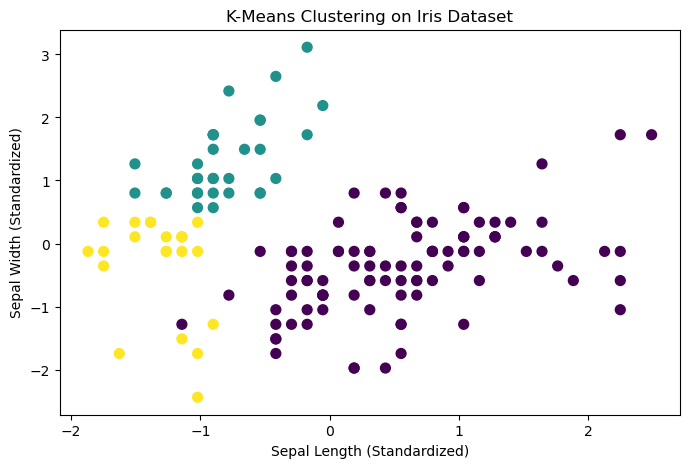

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=df['Cluster'], cmap='viridis', s=50)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Sepal Width (Standardized)")
plt.show()

#K-Means has divided all data points into 3 clusters (since k=3 for the Iris dataset).
#The clustering was done based on the patterns or similarity in the flower measurements (features like sepal length and width).
#The clusters show that:
#The yellow group (bottom-left) forms one cluster — flowers with shorter sepal length and smaller width.
#The green group (top-left) forms another cluster — flowers with shorter length but higher width.
#The purple group (right side) forms the third cluster — flowers with longer sepal length.

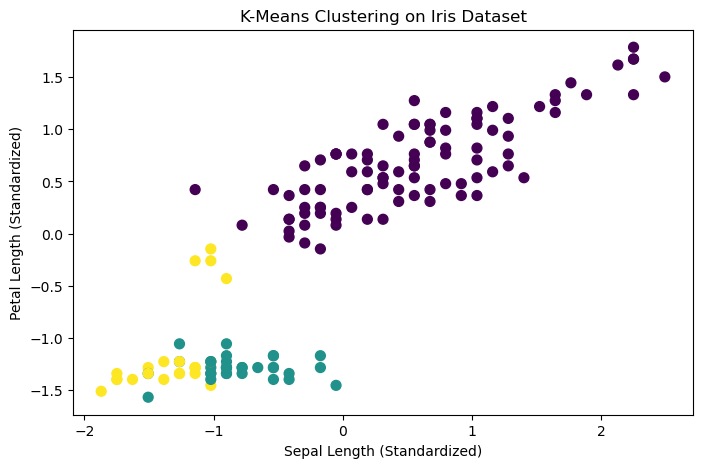

In [23]:
plt.figure(figsize=(8, 5))
plt.scatter(
X[:, 0], X[:, 2], # 1st feature (Sepal Length), 3rd feature (Petal Length)
c=df['Cluster'], cmap='viridis', s=50
)
plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Length (Standardized)")
plt.ylabel("Petal Length (Standardized)")
plt.show()

#Three clusters (K=3) are visible — shown by yellow, teal, and purple dots.
#The purple cluster (right side) corresponds to flowers with longer sepal and petal lengths.
#The yellow and teal clusters (bottom area) represent flowers with shorter petals, but they differ slightly in sepal length.
#These groups roughly correspond to the three species of Iris flowers:
#One cluster for Iris Setosa,
#One for Iris Versicolor,
#One for Iris Virginica.

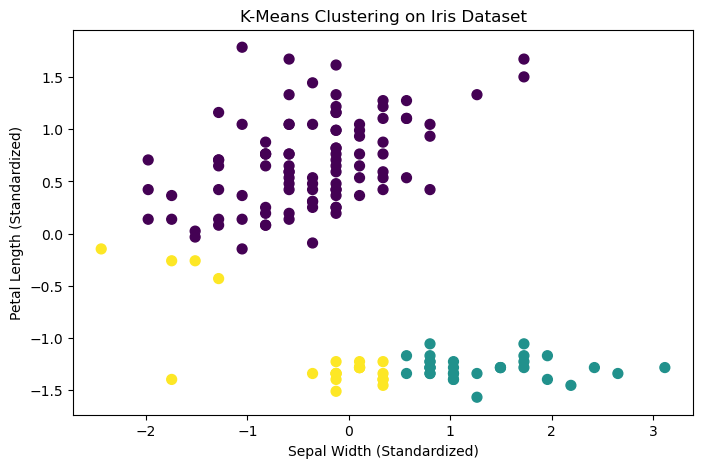

In [24]:
plt.figure(figsize=(8, 5))
plt.scatter(
X[:, 1], X[:, 2], # 2nd feature (Sepal Width), 3rd feature (Petal Length)
    #Represents the second feature (here, Sepal Width).
    #X[:, 1]: means “all rows”, and 1 means the column at index 1.
    #X[:, 2]:Represents the third feature (here, Petal Length).
c=df['Cluster'], cmap='viridis', s=50
)
#cmap='viridis'
#Specifies the color map (the palette used for the clusters).
#"viridis" gives nice green–yellow–blue shades.

#s=50 Sets the size of each scatter point. Larger s = bigger dots.

#c=df['Cluster']:Colors each point based on its cluster label (e.g., Cluster 0, 1, 2).
#This helps visualize which cluster each point belongs to.

plt.title("K-Means Clustering on Iris Dataset")
plt.xlabel("Sepal Width (Standardized)")
plt.ylabel("Petal Length (Standardized)")
plt.show()

#K-Means has grouped all 150 flowers from the Iris dataset into 3 distinct clusters.
#Each color shows a group of flowers that are similar in Sepal Width and Petal Length.
#The purple cluster (upper area) contains flowers with longer petals,
#while yellow and teal clusters (lower area) represent flowers with shorter petals but differing sepal widths.
#These clusters roughly match the three Iris species:
#Iris Setosa, Iris Versicolor, and Iris Virginica.

#Flowers with similar sepal width and petal length were grouped together.
#The clear color separation shows that the algorithm has done a good job at identifying natural groups.

In [25]:
sil = silhouette_score(X, clusters)
print(f"Silhouette Score for k={k}: {sil:.3f}")

#| Line                                              | Meaning                                                                                                                                                                                                                                                                                    |
#| ------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
#| `sil = silhouette_score(X, clusters)`             | Calculates the **Silhouette Score** for your current clustering. <br><br> 🔹 `X` → your dataset (input features). <br> 🔹 `clusters` → the cluster labels predicted by K-Means (e.g., 0, 1, 2). <br><br> The function checks how **well-separated** and **well-formed** your clusters are. |
#| `print(f"Silhouette Score for k={k}: {sil:.3f}")` | Prints the Silhouette Score value for the current `k`. <br> 🔹 `{k}` shows the number of clusters being tested. <br> 🔹 `{sil:.3f}` formats the score up to 3 decimal places.                                                                                                              |


Silhouette Score for k=3: 0.459
